# A Deep Dive into Film Data (English Movies from 2005 - 2023)

## INTRODUCTION

<font size='5'>Movie data analysis is the process of examining and drawing insights from vast amounts of data related to the film industry. It involves gathering information about movies, including details like release dates, genres, budgets, box office revenues, critical reception, and audience ratings. By exploring and analyzing this data, we can uncover fascinating trends, patterns, and correlations within the movie industry.

## KEY OBJECTIVES

<font size='5'>• Genre with Most Movies? <br>
    • Top 20 movies with Budget and Revenue? <br>
    • Does the movie industry show a noticeable trend of increasing budgets over years?<br>
    • What are the most profitable movie genres?<br>
    • How do budgets impact a movie's success?<br>
    • Is there a relationship between a movie's budget, its revenue, and the number of votes it receives?

## DATA SOURCE

<font size='5'>• The data set in this project was obtained from Kaggle. <br>   • It can be fount at https://www.kaggle.com/datasets/akshaypawar7/millions-of-movies

In [57]:
#importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.subplots as make_subplots

In [58]:
#reading data using pandas
movies = pd.read_csv(r'D:\Datasets\Movies\movies.csv')

In [59]:
movies.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,125.0,Released,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...
4,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,75000000.0,269000000.0,116.0,Released,You can't run from your past.,7.262,1129.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,/5i6SjyDbDWqyun8klUuCxrlFbyw.jpg,965839-267805-943822-842942-1035806-823999-107...


In [60]:
movies.shape

(722670, 20)

## DATA WRANGLING

In [61]:
#droping no needed columns for the analysis from data frame

movies = movies.drop(columns=['overview'])
movies = movies.drop(columns=['tagline'])
movies = movies.drop(columns=['keywords'])
movies = movies.drop(columns=['poster_path'])
movies = movies.drop(columns=['backdrop_path'])
movies = movies.drop(columns=['recommendations'])
movies = movies.drop(columns=['production_companies'])
movies = movies.drop(columns=['credits'])

In [62]:
#checking null values
movies.isnull().sum()

id                        0
title                     4
genres               210706
original_language         0
popularity                0
release_date          52111
budget                    0
revenue                   0
runtime               34424
status                    0
vote_average              0
vote_count                0
dtype: int64

In [63]:
#dropping null values
movies.dropna(inplace=True)

<font size= '5'> • Dropping null values from data frame because it can affect the results

In [64]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483194 entries, 0 to 722668
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 483194 non-null  int64  
 1   title              483194 non-null  object 
 2   genres             483194 non-null  object 
 3   original_language  483194 non-null  object 
 4   popularity         483194 non-null  float64
 5   release_date       483194 non-null  object 
 6   budget             483194 non-null  float64
 7   revenue            483194 non-null  float64
 8   runtime            483194 non-null  float64
 9   status             483194 non-null  object 
 10  vote_average       483194 non-null  float64
 11  vote_count         483194 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 47.9+ MB


In [65]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_average,vote_count
count,483194.000000,483194.000000,4.831940e+05,4.831940e+05,483194.000000,483194.000000,483194.000000
mean,492934.146049,2.356385,5.655229e+05,1.453182e+06,60.670704,3.123342,41.304617
std,262264.448032,25.385215,6.629765e+06,2.448957e+07,97.966269,3.262449,468.577802
min,2.000000,0.600000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,287999.250000,0.600000,0.000000e+00,0.000000e+00,10.000000,0.000000,0.000000
50%,487449.500000,0.840000,0.000000e+00,0.000000e+00,70.000000,2.000000,1.000000
75%,708851.500000,1.505000,0.000000e+00,0.000000e+00,93.000000,6.000000,4.000000
max,968155.000000,8763.998000,5.000000e+08,2.920357e+09,51420.000000,10.000000,33262.000000


<font size= '5'> • In the table, there are numerous zero values in budget and revenue, with the third quartile also being 0. Runtime ranges from 0 to an exceptionally high 51420 minutes, and there are several low values in vote count.

In [66]:
#checking duplicated values

movies.duplicated().sum()

46

In [67]:
#droping duplicate values

movies.drop_duplicates(inplace=True)

## Investigating Column by Column

In [68]:
#To check for duplicate values in the 'name' column.

movies['title'].duplicated().sum()

101020

<font size= '5'> • There can be names with same name. so we have to chack both name and release date for duplicate values

In [69]:
movies[['title', 'release_date']].duplicated().sum()

47592

In [70]:
movies.drop_duplicates(subset=['title', 'release_date'], inplace=True)

In [71]:
movies.shape

(435556, 12)

In [72]:
movies.original_language.value_counts()

en    211806
fr     28134
es     23670
de     22770
ja     17645
       ...  
ki         1
nv         1
ii         1
ia         1
li         1
Name: original_language, Length: 159, dtype: int64

<font size= '5'> • There are movies with many languages. So let's filter and retrieve only the English-language movies.

In [73]:
#filtering movies by original language

movies = movies[movies['original_language'] == 'en']
movies.shape

(211806, 12)

In [74]:
movies.genres.value_counts()

Documentary                                  42302
Drama                                        21387
Comedy                                       15802
Animation                                    11236
Music                                         9430
                                             ...  
Romance-TV Movie-Family-Drama                    1
Thriller-TV Movie-Fantasy-Horror-Family          1
Animation-Adventure-Drama-Fantasy-Romance        1
TV Movie-Documentary-Science Fiction             1
Horror-Science Fiction-Mystery-Drama             1
Name: genres, Length: 7732, dtype: int64

<font size= '5'> • We should categorize the movies into their main genres.

In [75]:
#making a new column for primary genre

movies['primary_genres'] = movies['genres'].str.split('-')
movies['primary_genres'] = movies['primary_genres'].str.get(0)

In [76]:
movies.primary_genres.value_counts()

Documentary        49746
Drama              38166
Comedy             29841
Animation          17619
Horror             13825
Music              12593
Action             10243
Thriller            6442
Crime               5040
Western             4368
Romance             4102
Science Fiction     3803
Adventure           3516
Family              3509
TV Movie            2646
Fantasy             2132
Mystery             2129
History             1116
War                  970
Name: primary_genres, dtype: int64

In [77]:
movies.release_date.value_counts()

2017-01-01    644
2013-01-01    626
2012-01-01    625
2006-01-01    611
2011-01-01    608
             ... 
1973-02-17      1
1981-04-30      1
1972-10-11      1
1982-11-26      1
1914-01-16      1
Name: release_date, Length: 33602, dtype: int64

In [78]:
#filter movies based on their time period.

movies = movies[(movies['release_date'] >= '2005-01-01') & (movies['release_date'] < '2024-01-01')]
movies.shape

(120325, 13)

In [79]:
#extracting only year from release date

movies['release_year'] = movies['release_date'].str[:4]
movies.release_year.value_counts()

2021    10579
2020    10519
2019    10188
2018     9380
2017     9296
2016     8172
2015     8052
2014     7592
2013     7193
2012     5856
2011     4959
2010     4371
2009     4250
2008     4022
2022     3975
2006     3929
2007     3863
2005     3518
2023      611
Name: release_year, dtype: int64

In [80]:
movies.budget.value_counts()

0.0          105735
10000.0         421
1000000.0       386
5000.0          337
1000.0          313
              ...  
975000.0          1
1599411.0         1
80399.0           1
103000.0          1
106.0             1
Name: budget, Length: 1725, dtype: int64

In [81]:
movies.revenue.value_counts()

0.0            114800
1.0                67
100.0              51
10.0               26
1000000.0          26
                ...  
39143839.0          1
183293131.0         1
111353135.0         1
6928068.0           1
9554.0              1
Name: revenue, Length: 4942, dtype: int64

<font size= '5'> • There are over 100,000 instances with zero values for both budget and revenue.In that case, we should filter and remove these instances with zero values for both budget and revenue.

In [82]:
#filtering and removing zero values

movies = movies[(movies['budget'] != 0) & (movies['revenue'] != 0)]
movies.shape

(3985, 14)

In [83]:
movies.runtime.value_counts()

90.0     118
97.0     116
100.0    112
93.0      94
99.0      90
        ... 
182.0      1
184.0      1
237.0      1
27.0       1
480.0      1
Name: runtime, Length: 194, dtype: int64

In [84]:
movies.status.value_counts()

Released         3982
In Production       2
Rumored             1
Name: status, dtype: int64

In [85]:
movies.vote_average.value_counts()

0.000     282
10.000    149
6.200     135
6.100     122
6.000     120
         ... 
5.231       1
6.533       1
7.398       1
6.112       1
8.600       1
Name: vote_average, Length: 1021, dtype: int64

In [86]:
movies.vote_count.value_counts()

0.0       282
1.0       270
2.0        59
3.0        19
6.0        12
         ... 
9463.0      1
1150.0      1
2511.0      1
1482.0      1
3781.0      1
Name: vote_count, Length: 2333, dtype: int64

<font size= '5'> • We'll proceed by removing all movies with a vote average of 0 and a vote count below 100.

In [87]:
movies = movies[(movies['vote_average'] != 0) & (movies['vote_count'] >= 100)]
movies.shape

(3044, 14)

In [88]:
movies.columns

Index(['id', 'title', 'genres', 'original_language', 'popularity',
       'release_date', 'budget', 'revenue', 'runtime', 'status',
       'vote_average', 'vote_count', 'primary_genres', 'release_year'],
      dtype='object')

## DATA ANALYSIS

In [89]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_average,vote_count
count,3044.000000,3044.000000,3.044000e+03,3.044000e+03,3044.000000,3044.000000,3044.000000
mean,189138.633706,53.401642,4.477222e+07,1.312309e+08,108.307162,6.448659,2904.983574
std,204110.500299,287.856740,5.304138e+07,2.343393e+08,18.002956,0.769006,3849.962286
min,25.000000,0.822000,5.000000e+00,1.000000e+00,62.000000,1.900000,100.000000
25%,14346.000000,13.157500,1.000000e+07,1.016674e+07,96.000000,5.950500,576.000000
50%,84348.000000,20.114000,2.500000e+07,4.713201e+07,105.000000,6.439500,1464.000000
75%,333069.000000,35.580000,5.500000e+07,1.423529e+08,118.000000,7.000000,3584.250000
max,968051.000000,8763.998000,4.600000e+08,2.920357e+09,339.000000,8.640000,33262.000000


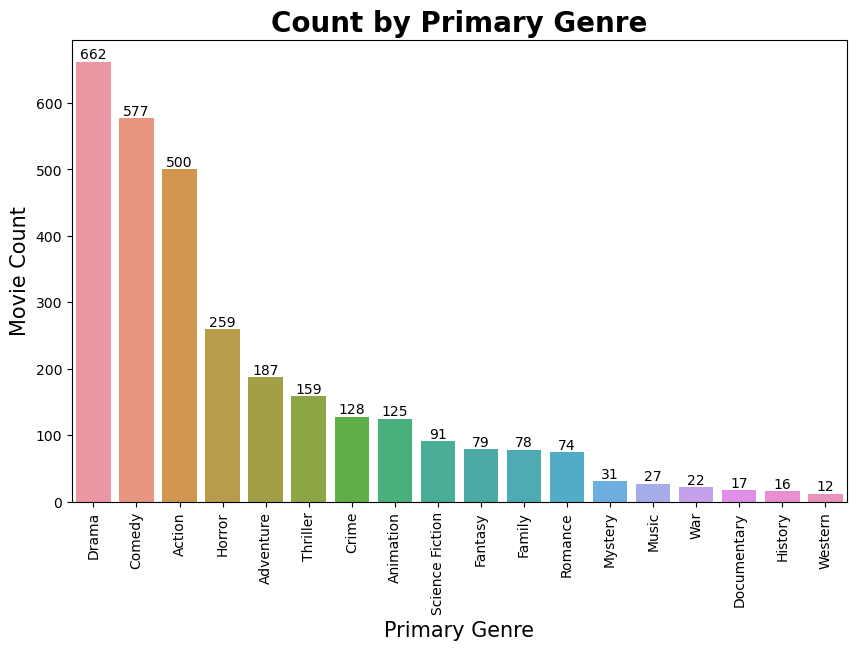

In [90]:
fig = plt.figure(figsize=(10,6))
fig = sns.countplot(x = movies['primary_genres'], order= movies['primary_genres'].value_counts().index)

for c in fig.containers:
    fig.bar_label(c)
    
plt.xticks(rotation = 90)
plt.title('Count by Primary Genre', fontdict={'size':20, 'weight':'bold'})
plt.xlabel('Primary Genre', fontdict={'size':15})
plt.ylabel('Movie Count', fontdict={'size':15})
plt.show()

<font size= '5'> • From the available data, it's evident that the most prevalent movie genre is drama, followed by comedy and action.

In [91]:
movies[movies['popularity'] == movies.popularity.max()]

,id,title,genres,original_language,popularity,release_date,budget,revenue,runtime,status,vote_average,vote_count,primary_genres,release_year
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,8763.998,2023-08-02,129000000.0,352056482.0,116.0,Released,7.079,1365.0,Action,2023


In [92]:
movies[movies['popularity'] == movies.popularity.min()]

,id,title,genres,original_language,popularity,release_date,budget,revenue,runtime,status,vote_average,vote_count,primary_genres,release_year
286489,116741,The Internship,Comedy,en,0.822,2013-06-07,58000000.0,44000000.0,119.0,Released,6.3,3781.0,Comedy,2013


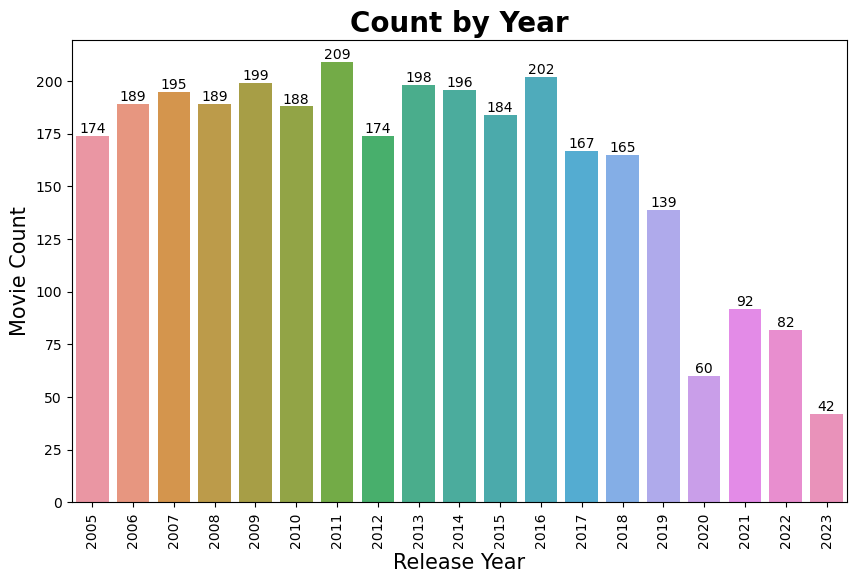

In [93]:
movies['release_year'] = movies['release_year'].astype(int)
year = movies[['release_year']].sort_values(by = 'release_year', ascending = True)
fig = plt.figure(figsize=(10,6))
fig = sns.countplot(year, x = 'release_year')

for c in fig.containers:
    fig.bar_label(c)
    
plt.xticks(rotation = 90)
plt.title('Count by Year', fontdict={'size':20, 'weight':'bold'})
plt.xlabel('Release Year', fontdict={'size':15})
plt.ylabel('Movie Count', fontdict={'size':15})
plt.show()

<font size= '5'> • It's clear that movie releases have significantly decreased after the year 2020.

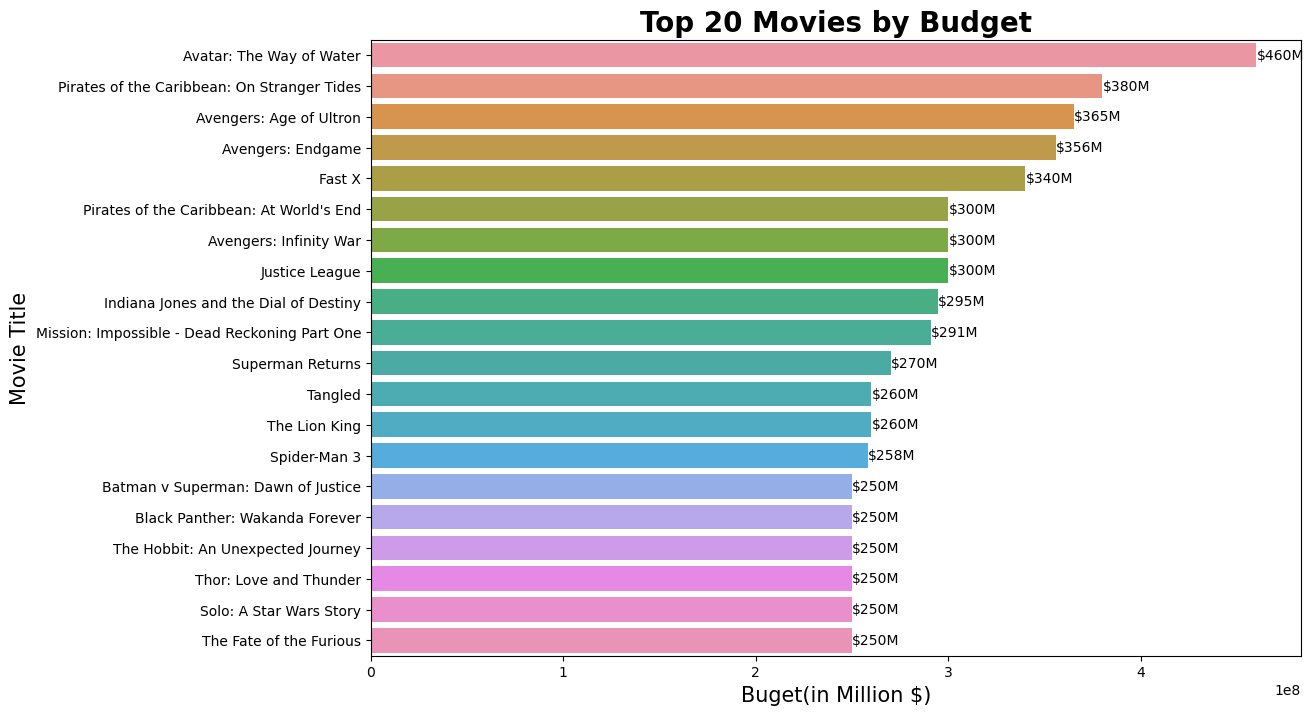

In [94]:
budget = movies[['title', 'budget']].sort_values(by = 'budget', ascending = False)[:20]
fig = plt.figure(figsize=(12,8))
fig = sns.barplot(budget, x = 'budget', y = 'title')

for p in fig.patches:
    width = p.get_width()
    fig.text(width, p.get_y() + p.get_height() / 2 , f'${width/1000000:.0f}M', va = 'center')

plt.title('Top 20 Movies by Budget', fontdict={'size':20, 'weight':'bold'})
plt.xlabel('Buget(in Million $)', fontdict={'size':15})
plt.ylabel('Movie Title', fontdict={'size':15})
plt.show()

<font size= '5'> • We can observe that all of the top 20 movies have budgets exceeding 250 million dollars, with 'Avatar: The Way of Water' having the highest budget at 460 million dollars. </font>

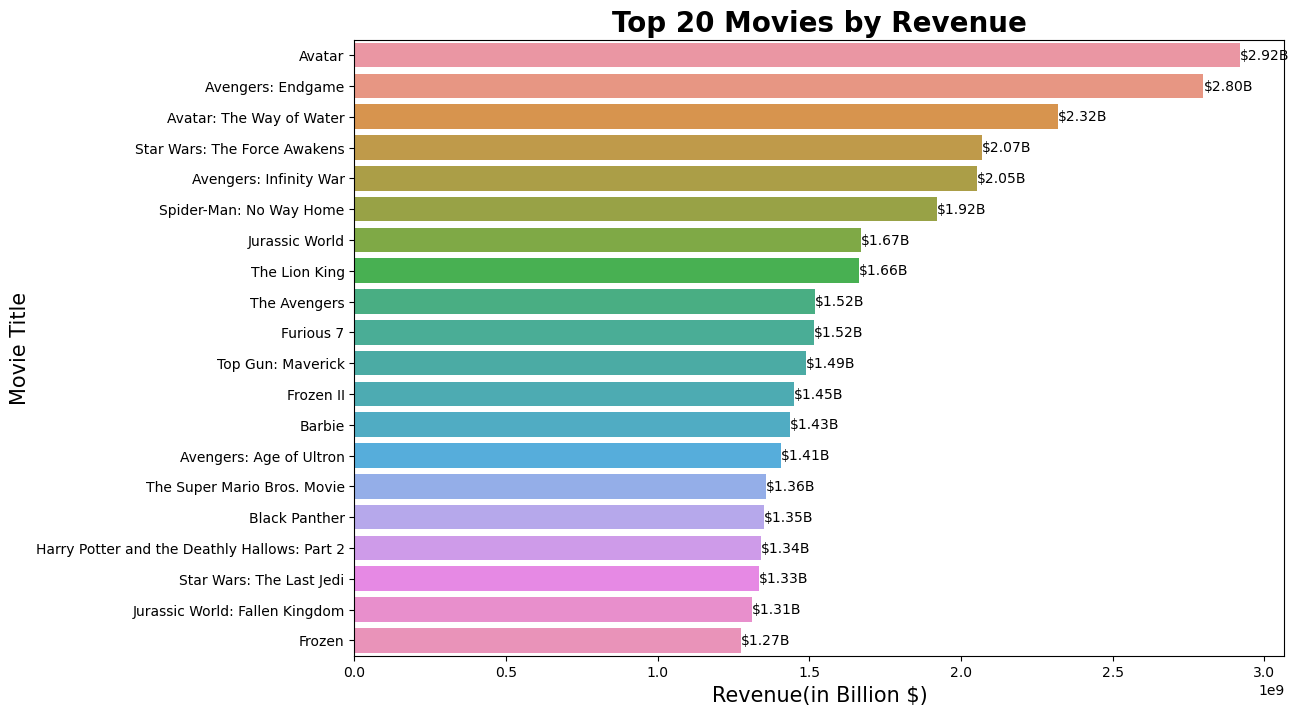

In [95]:
revenue = movies[['title', 'revenue']].sort_values(by = 'revenue', ascending = False)[:20]
fig = plt.figure(figsize=(12,8))
fig = sns.barplot(revenue, x = 'revenue', y = 'title')

for p in fig.patches:
    width = p.get_width()
    fig.text(width, p.get_y() + p.get_height() / 2 , f'${width/1000000000:.2f}B', va ='center')
    
plt.title('Top 20 Movies by Revenue', fontdict={'size':20, 'weight':'bold'})
plt.xlabel('Revenue(in Billion $)', fontdict={'size':15})
plt.ylabel('Movie Title', fontdict={'size':15})
plt.show()

<font size = '5'>• It appears that all 20 movies have generated over 1 billion dollars in revenue, with 'Avatar' leading the way with almost 3 billion in revenue, securing its position in first place.

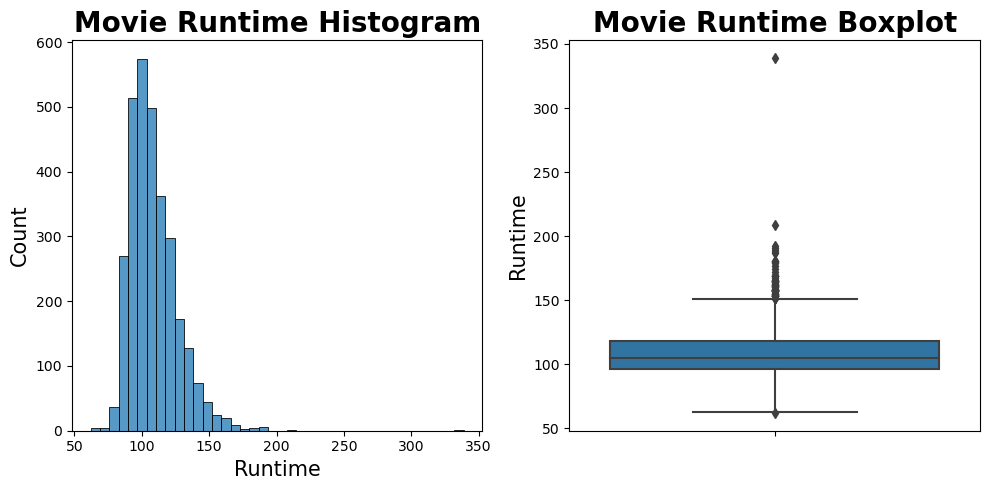

In [96]:
fig, axes = plt.subplots(1, 2, figsize =(10,5))

fig1 = sns.histplot(movies, x = 'runtime', bins= 40, ax=axes[0])

fig1.set_title('Movie Runtime Histogram', fontdict={'size':20, 'weight':'bold'})
fig1.set_xlabel('Runtime', fontdict={'size':15})
fig1.set_ylabel('Count', fontdict={'size':15})

fig2 = sns.boxplot(movies, y = 'runtime', ax=axes[1])

fig2.set_title('Movie Runtime Boxplot', fontdict={'size':20, 'weight':'bold'})
fig2.set_ylabel('Runtime', fontdict={'size':15})

plt.tight_layout()
plt.show()

<font size = '5'> • The majority of movies in the dataset have a runtime that falls within the range of 80 minutes to 130 minutes.

In [97]:
#investigation outliers

movies[['title', 'runtime', 'primary_genres', 'release_year']][(movies['runtime'] < 75) | (movies['runtime'] > 200)].sort_values(by = 'runtime')

,title,runtime,primary_genres,release_year
27186,Louis C.K.: Live at the Beacon Theater,62.0,Comedy,2011
6005,Winnie the Pooh,63.0,Animation,2011
23219,Who Killed Captain Alex?,64.0,Action,2010
3763,Pooh's Heffalump Movie,68.0,Family,2005
15327,The Head Hunter,72.0,Horror,2019
38021,The Fits,72.0,Drama,2016
3315,The Irishman,209.0,Crime,2019
19115,Carlos,339.0,Crime,2010


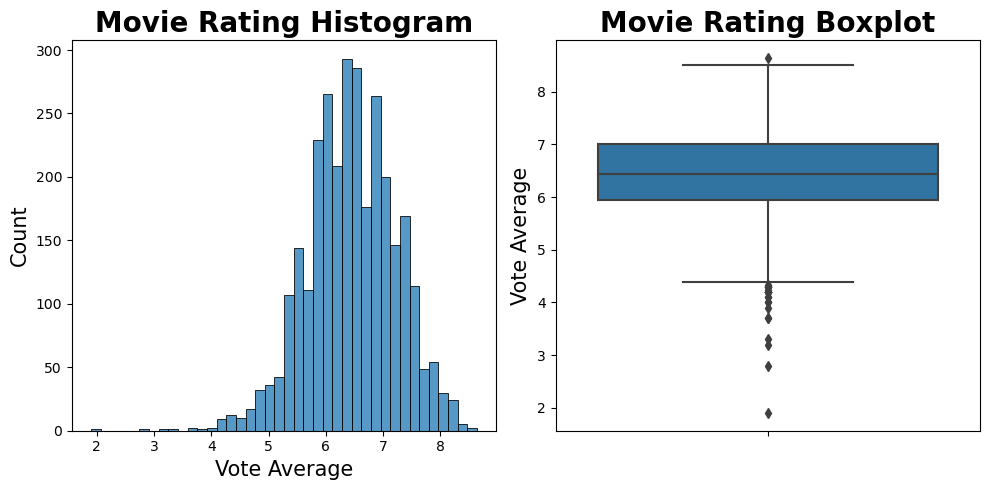

In [98]:
fig, axes = plt.subplots(1, 2, figsize =(10,5))

fig1 = sns.histplot(movies, x = 'vote_average', bins= 40, ax=axes[0])

fig1.set_title('Movie Rating Histogram', fontdict={'size':20, 'weight':'bold'})
fig1.set_xlabel('Vote Average', fontdict={'size':15})
fig1.set_ylabel('Count', fontdict={'size':15})

fig2 = sns.boxplot(movies, y = 'vote_average', ax=axes[1])

fig2.set_title('Movie Rating Boxplot', fontdict={'size':20, 'weight':'bold'})
fig2.set_ylabel('Vote Average', fontdict={'size':15})

plt.tight_layout()
plt.show()

<font size = '5'> • It seems that the Movie Ratings of most movies falls within the range of 5.5 to 7.5.

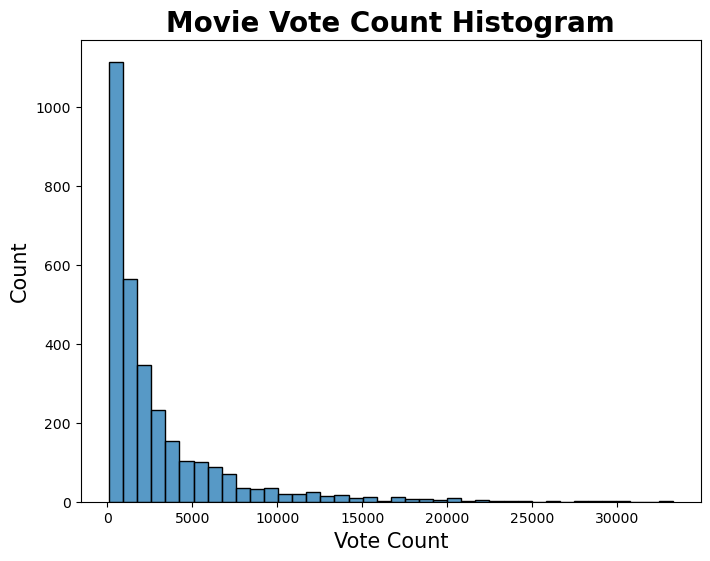

In [99]:
fig = plt.figure(figsize=(8,6))
fig = sns.histplot(movies, x = 'vote_count', bins= 40)

plt.title('Movie Vote Count Histogram', fontdict={'size':20, 'weight':'bold'})
plt.xlabel('Vote Count', fontdict={'size':15})
plt.ylabel('Count', fontdict={'size':15})

plt.show()

In [100]:
movies[movies['vote_count'] == movies.vote_count.max()]

,id,title,genres,original_language,popularity,release_date,budget,revenue,runtime,status,vote_average,vote_count,primary_genres,release_year
712,27205,Inception,Action-Science Fiction-Adventure,en,79.545,2010-07-15,160000000.0,825532764.0,148.0,Released,8.361,33262.0,Action,2010


In [101]:
movies[movies['vote_count'] == movies.vote_count.min()]

,id,title,genres,original_language,popularity,release_date,budget,revenue,runtime,status,vote_average,vote_count,primary_genres,release_year
7550,466411,Speed Kills,Crime-Drama-Thriller,en,16.197,2018-11-16,15000000.0,5812.0,102.0,Released,5.6,100.0,Crime,2018
17518,62796,William & Kate,Drama-Romance-TV Movie,en,9.274,2011-04-18,20.0,15.0,83.0,Released,5.7,100.0,Drama,2011


<font size = '5'> • Insception have Highest vote count with 33262 votes.

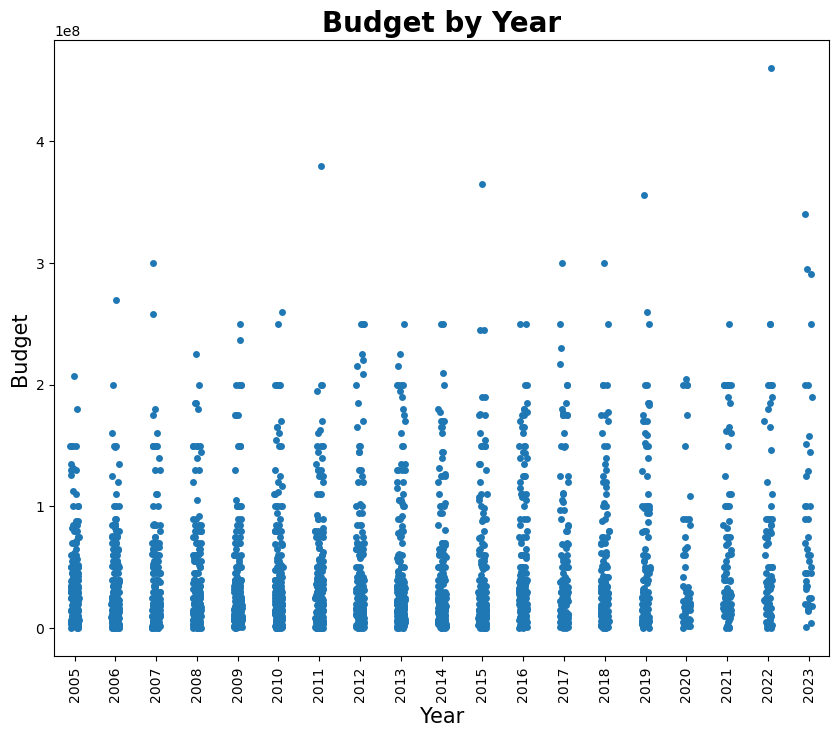

In [102]:
fig = plt.figure(figsize=(10,8))
fig = sns.stripplot(movies, x = 'release_year', y = 'budget')

plt.xticks(rotation=90)
plt.title('Budget by Year', fontdict={'size':20, 'weight':'bold'})
plt.xlabel('Year', fontdict={'size':15})
plt.ylabel('Budget', fontdict={'size':15})

plt.show()

<font size = '5'> • It appears that there is no clear increase in movie budgets over the years.

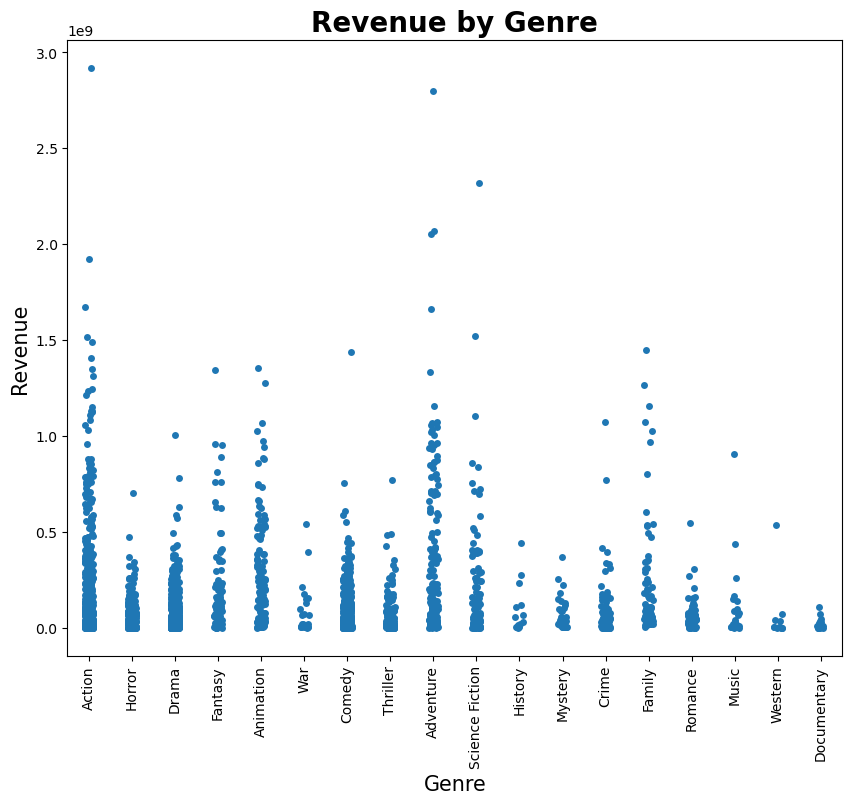

In [103]:
fig = plt.figure(figsize=(10,8))
fig = sns.stripplot(movies, x = 'primary_genres', y = 'revenue')

plt.xticks(rotation=90)
plt.title('Revenue by Genre', fontdict={'size':20, 'weight':'bold'})
plt.xlabel('Genre', fontdict={'size':15})
plt.ylabel('Revenue', fontdict={'size':15})

plt.show()

<font size = '5'> • It's noticeable that action and adventure movies tend to have higher revenues compared to other genres. This is likely due to the presence of more movies within this genre that have crossed the $500 million revenue mark.

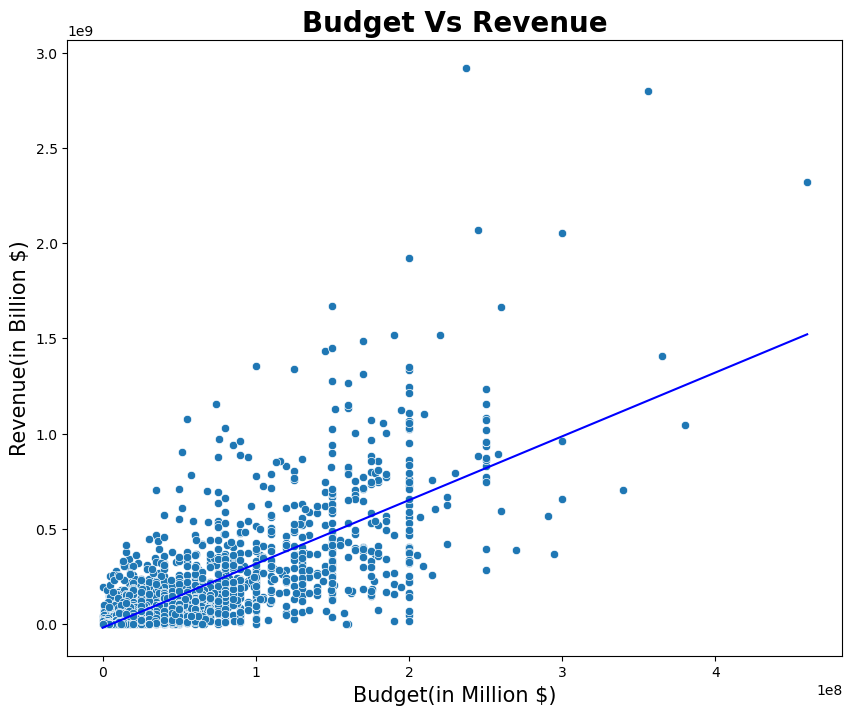

In [104]:
fig = plt.figure(figsize=(10,8))
fig = sns.scatterplot(movies, x= 'budget', y = 'revenue')

x = movies['budget']
y = movies['revenue']
reg_line = np.polyfit(x, y, 1)
trendline_x  = np.array([max(x), min(x)])
trendline_y = np.polyval(reg_line, trendline_x)
plt.plot(trendline_x, trendline_y, color = 'blue')

plt.title('Budget Vs Revenue', fontdict={'size': 20, 'weight':'bold'})
plt.xlabel('Budget(in Million $)', fontdict={'size':15})
plt.ylabel('Revenue(in Billion $)', fontdict={'size':15})
plt.show()

<font size = '5'> • From the scatterplot, it appears that there is a positive correlation between budget and revenue, suggesting that higher budgets are associated with higher revenues.

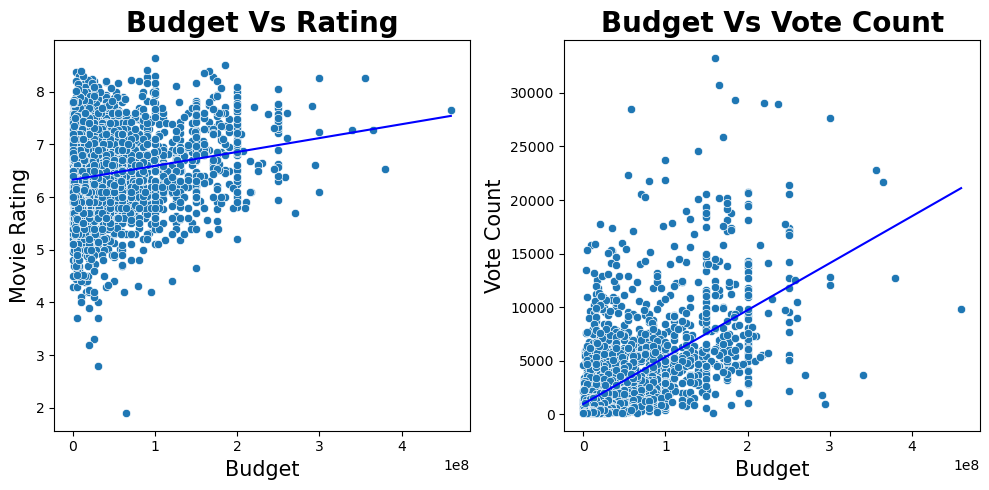

In [105]:
fig, axes = plt.subplots(1, 2, figsize =(10,5))

fig1 = sns.scatterplot(movies, x = 'budget', y = 'vote_average', ax=axes[0])

x = movies['budget']
y = movies['vote_average']
reg_line = np.polyfit(x, y, 1)
trendline_x  = np.array([max(x), min(x)])
trendline_y = np.polyval(reg_line, trendline_x)
fig1.plot(trendline_x, trendline_y, color = 'blue')

fig1.set_title('Budget Vs Rating', fontdict={'size':20, 'weight':'bold'})
fig1.set_xlabel('Budget', fontdict={'size':15})
fig1.set_ylabel('Movie Rating', fontdict={'size':15})

fig2 = sns.scatterplot(movies, x = 'budget', y = 'vote_count', ax=axes[1])

x = movies['budget']
y = movies['vote_count']
reg_line = np.polyfit(x, y, 1)
trendline_x  = np.array([max(x), min(x)])
trendline_y = np.polyval(reg_line, trendline_x)
fig2.plot(trendline_x, trendline_y, color = 'blue')

fig2.set_title('Budget Vs Vote Count', fontdict={'size':20, 'weight':'bold'})
fig2.set_xlabel('Budget', fontdict={'size':15})
fig2.set_ylabel('Vote Count', fontdict={'size':15})

plt.tight_layout()
plt.show()

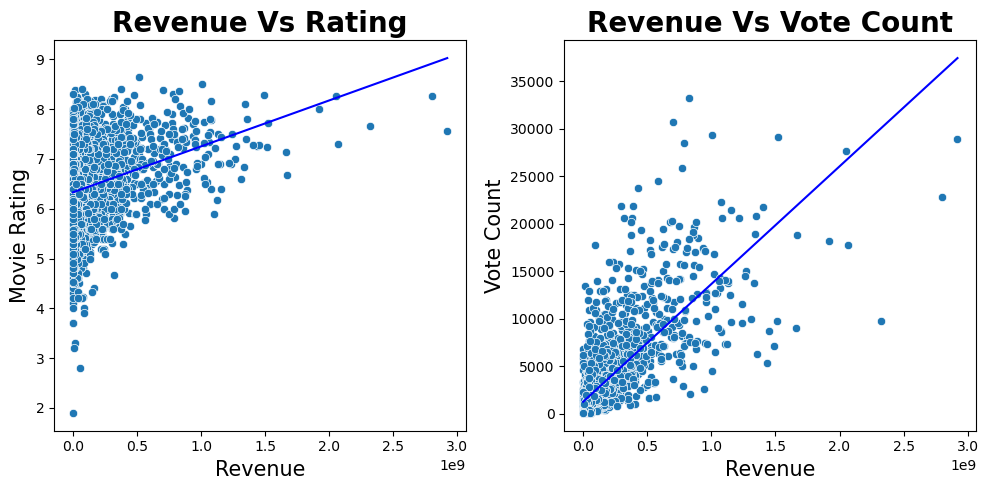

In [106]:
fig, axes = plt.subplots(1, 2, figsize =(10,5))

fig1 = sns.scatterplot(movies, x = 'revenue', y = 'vote_average', ax=axes[0])

x = movies['revenue']
y = movies['vote_average']
reg_line = np.polyfit(x, y, 1)
trendline_x  = np.array([max(x), min(x)])
trendline_y = np.polyval(reg_line, trendline_x)
fig1.plot(trendline_x, trendline_y, color = 'blue')

fig1.set_title('Revenue Vs Rating', fontdict={'size':20, 'weight':'bold'})
fig1.set_xlabel('Revenue', fontdict={'size':15})
fig1.set_ylabel('Movie Rating', fontdict={'size':15})

fig2 = sns.scatterplot(movies, x = 'revenue', y = 'vote_count', ax=axes[1])

x = movies['revenue']
y = movies['vote_count']
reg_line = np.polyfit(x, y, 1)
trendline_x  = np.array([max(x), min(x)])
trendline_y = np.polyval(reg_line, trendline_x)
fig2.plot(trendline_x, trendline_y, color = 'blue')

fig2.set_title('Revenue Vs Vote Count', fontdict={'size':20, 'weight':'bold'})
fig2.set_xlabel('Revenue', fontdict={'size':15})
fig2.set_ylabel('Vote Count', fontdict={'size':15})

plt.tight_layout()
plt.show()

<font size = '5'> •It seems that there is a positive correlation between budget, revenue, and vote count. This suggests that movies with higher budgets and revenues tend to attract more votes or attention from viewers.

## CONCLUSION

<font size = '5'> •Genre Drama has Highest Movies.<br>•All of the top 20 movies have budgets exceeding 250 million dollars and all 20 movies have generated over 1 billion dollars in revenue.<br>•there is no clear increase in movie budgets over the years.<br>•It's evident that movies with higher budgets tend to generate higher revenues.<br>•Movies with higher budgets and revenues tend to attract more votes or attention from viewers.
